# Predictive model

In [2]:
import sys
sys.path.append('D:/source/repos')
from utilities.std_imports import *

from datetime import datetime
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import tensorflow.keras.models as tkm
import tensorflow.keras.layers as tkl
import trading.utils.SurfTrading as st
from mlfs.utils.LSTM import *
from ds_topics.utils.data_balance import *

### Model

In [2]:
def get_LSTM_model(X_train):
    model = tkm.Sequential()
    model.add(tkl.LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(tkl.Dense(1))
    model.compile(loss='mae', optimizer='adam')
    return model

def fit_model(model, X_train, y_train, X_test, y_test, verbose=0):
    history = model.fit(X_train, y_train, epochs=10, batch_size=72, validation_data=(X_test, y_test), verbose=verbose, shuffle=False)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()
    
def predict(model, X_test, y_test, rows):
    pred = model.predict(X_test)
    res = pd.DataFrame(y_test[:,0], columns=['real'])
    res['pred'] = np.round(pred)
    return res.head(rows)

### Testing

#### Data Loading

[*********************100%***********************]  1 of 1 completed


,High
Datetime,
2020-10-29 09:30:00-04:00,215.509995
2020-10-29 09:31:00-04:00,215.190002
2020-10-29 09:32:00-04:00,214.979996
2020-10-29 09:33:00-04:00,215.809998
2020-10-29 09:34:00-04:00,215.649994
2020-10-29 09:35:00-04:00,215.679993
2020-10-29 09:36:00-04:00,214.815002
2020-10-29 09:37:00-04:00,215.000000
2020-10-29 09:38:00-04:00,214.934998


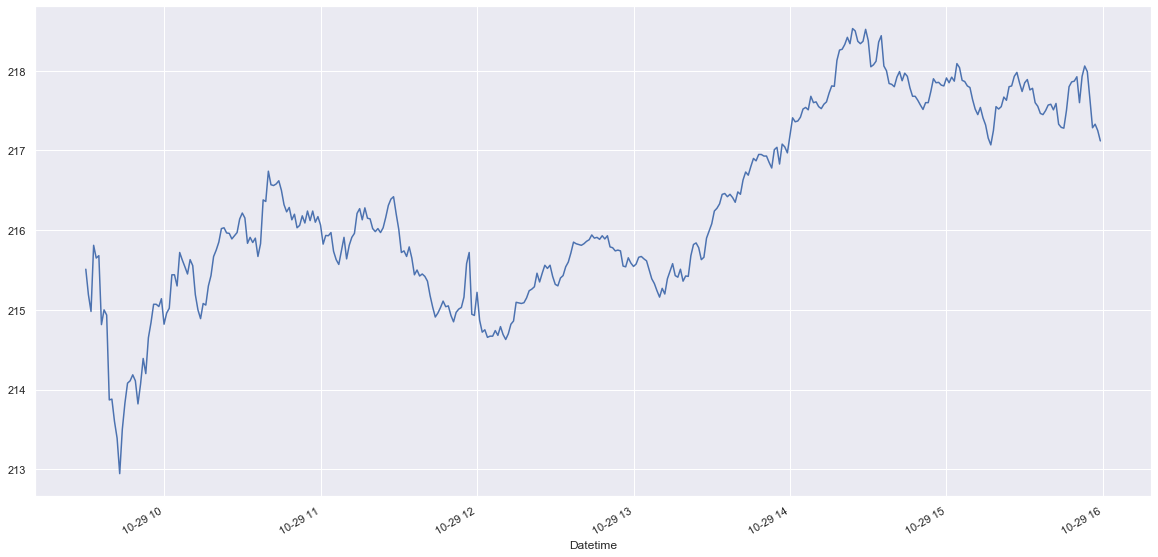

In [3]:
ts = st.get_rtdata('ACN')
plt.figure(figsize=(20, 10));
ts.plot();
pd.DataFrame(ts).head(20)

In [4]:
ds = st.GenTrendDs(ts=ts, start=0, nHist=15, nFcst=15, tpVar=0.2, slVar=0.2, incFcst=False)
ds.to_csv('train.csv')
ds

,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12,H13,H14,H15,Trend
0,215.509995,215.190002,214.979996,215.809998,215.649994,215.679993,214.815002,215.000000,214.934998,213.869995,213.880005,213.600006,213.389999,212.945007,213.500000,1.0
1,215.190002,214.979996,215.809998,215.649994,215.679993,214.815002,215.000000,214.934998,213.869995,213.880005,213.600006,213.389999,212.945007,213.500000,213.830002,1.0
2,214.979996,215.809998,215.649994,215.679993,214.815002,215.000000,214.934998,213.869995,213.880005,213.600006,213.389999,212.945007,213.500000,213.830002,214.080002,1.0
3,215.809998,215.649994,215.679993,214.815002,215.000000,214.934998,213.869995,213.880005,213.600006,213.389999,212.945007,213.500000,213.830002,214.080002,214.110001,1.0
4,215.649994,215.679993,214.815002,215.000000,214.934998,213.869995,213.880005,213.600006,213.389999,212.945007,213.500000,213.830002,214.080002,214.110001,214.184998,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,217.809998,217.929993,217.979996,217.850006,217.740005,217.850006,217.889999,217.759995,217.779999,217.600006,217.554993,217.464996,217.449997,217.500000,217.570007,1.0
354,217.929993,217.979996,217.850006,217.740005,217.850006,217.889999,217.759995,217.779999,217.600006,217.554993,217.464996,217.449997,217.500000,217.570007,217.580002,1.0
355,217.979996,217.850006,217.740005,217.850006,217.889999,217.759995,217.779999,217.600006,217.554993,217.464996,217.449997,217.500000,217.570007,217.580002,217.509995,1.0
356,217.850006,217.740005,217.850006,217.889999,217.759995,217.779999,217.600006,217.554993,217.464996,217.449997,217.500000,217.570007,217.580002,217.509995,217.589996,1.0


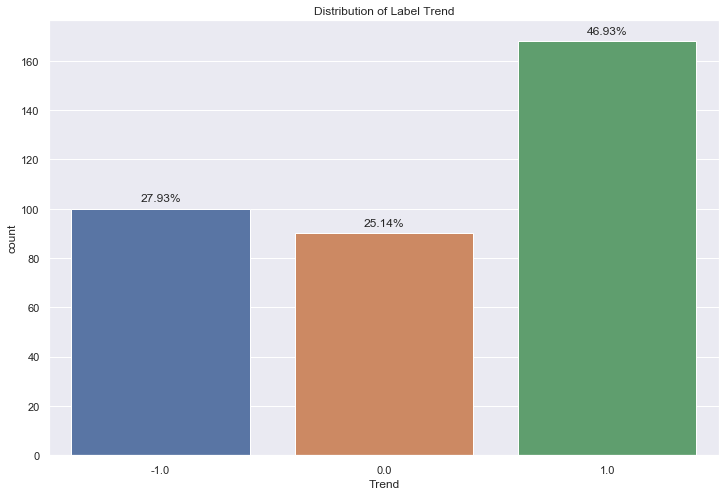

In [5]:
catlabel_dist(ds, 'Trend')

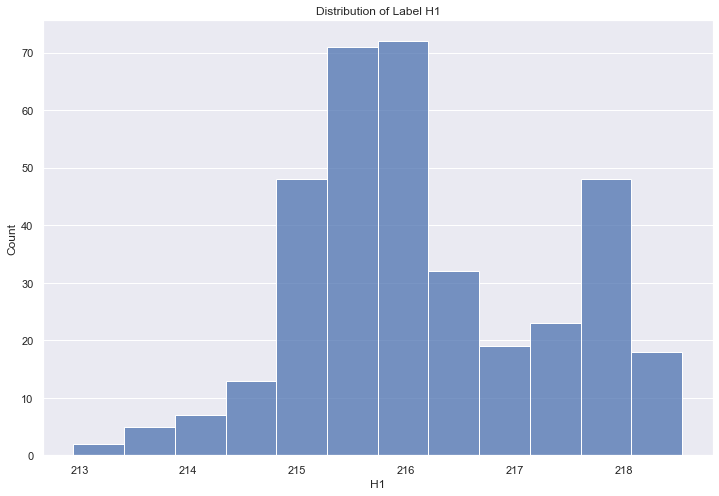

In [6]:
numlabel_dist(ds, 'H1')